### Standard library features

In [1]:
from memory import memset_zero
struct StaticArray[size:Int, dtype:DType=DType.float64](Boolable):
    var _ptr: DTypePointer[dtype]

    @always_inline
    fn __init__(inout self):
        self._ptr = DTypePointer[dtype]()

    fn __init__(inout self, *data: Scalar[dtype]):
        self._ptr = DTypePointer[dtype].alloc(size)
        memset_zero[dtype](self._ptr, size)
        for i in range(size):
            self._ptr[i] = data[i]
        if len(data)>size:
            print("Ignoring all values >",size,"number of values")

    fn __getitem__[idx: Int](self) -> Scalar[dtype]:
        constrained[idx<size, "Index value must be less than static array size"]()
        return self._ptr.load(idx)

    fn __del__(owned self):
        self._ptr.free()

    fn __len__(self) -> Int:
        return size

    fn __bool__(self) -> Bool:
        return Bool(self._ptr)

    fn __str__(self) -> String:
        var s: String = ""
        s += "["
        for i in range(len(self)):
            if i>0:
                s+=" "
            s+=self._ptr[i]
        s+="]"
        return s

var arr = StaticArray[6](1,2,3,4,5,6)
if Bool(arr):
    print(arr)
    print("1st element arr[0]:", arr[0])
else:
    print("This array is empty :( ")

var empty_arr = StaticArray[4]()
if Bool(empty_arr):
    print(empty_arr)
else:
    print("This array is empty :( ")

print(arr[5])

[1.0 2.0 3.0 4.0 5.0 6.0]
1st element arr[0]: 1.0
This array is empty :( 
6.0


In [2]:
%%python
import numpy as np
import matplotlib.pyplot as plt

def plot_results(history, min_val):
    # Define Rosenbrock function
    def rosenbrock(x, y):
        return (1 - x)**2 + 100 * (y - x**2)**2

    # Generate data for contour plot
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-1, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot surface in the left subplot
    ax1.contour(X, Y, Z, levels=50, cmap='viridis')
    ax1.scatter(history[:, 0], history[:, 1], color='red', marker='.', label='Gradient Descent Path', s=1)
    ax1.plot(history[:, 0], history[:, 1], color='red', linewidth=2, linestyle='-', alpha=0.5)
    ax1.scatter(min_val[0], min_val[1], color='green', marker='o', label='Minimum Point')
    ax1.axvline(x=1, color='magenta', linestyle='--')
    ax1.axhline(y=1, color='magenta', linestyle='--')
    ax1.text(1, 1, "(1,1)", fontsize=12, color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Gradient Descent Path on Rosenbrock Function (Contour Plot)')
    plt.grid(True)
    ax1.legend()

    # Plot contour plot in the right subplot
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.view_init(elev=40, azim=-70, roll=None)
    ax2.plot_surface(X, Y, Z, cmap='viridis', rstride=1, cstride=1, alpha=0.7, edgecolor='none')
    ax2.scatter(min_val[0], min_val[1], rosenbrock(min_val[0], min_val[1]), color='green', s=100, label='Minimum Point')
    ax2.plot(history[:, 0], history[:, 1], rosenbrock(history[:, 0], history[:, 1]), color='red', label='Gradient Descent Path')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    ax2.set_title('Gradient Descent Path on Rosenbrock Function (3D)')
    ax2.legend()

    plt.show()

Minimum of Rosenbrock function:
x = 0.99466952190364388
y = 0.98934605887632932
Function value at minimum point: 2.8459788146378422e-05


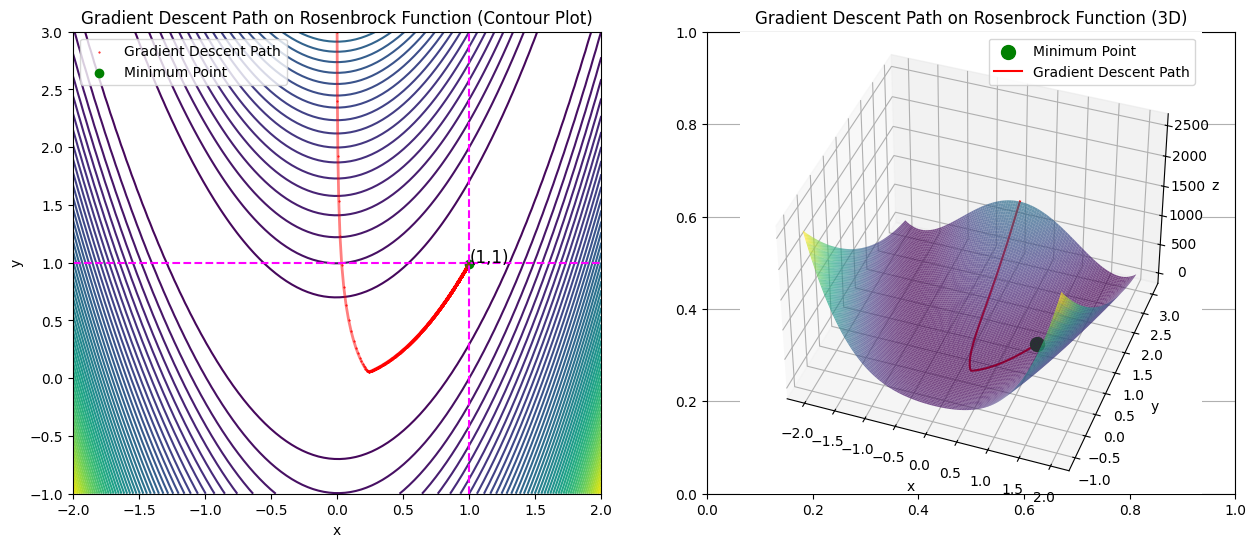

In [3]:
from python import Python
from testing import assert_true
np = Python.import_module("numpy")
plt = Python.import_module("matplotlib.pyplot")

# Define Rosenbrock function
def rosenbrock(x: Float64, y: Float64) -> Float64:
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_gradient(x: Float64, y: Float64) -> Tuple[Float64, Float64]:
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return (dx, dy)  # Return as a tuple

# Gradient Descent function
def gradient_descent(params: Dict[String,Float64]) -> List[Tuple[Float64, Float64, Float64]]:
    assert_true(params, "Optimization parameters are empty")

    x = params['initial_x']
    y = params['initial_y']
    history = List[Tuple[Float64, Float64, Float64]]()
    history.append((x, y, rosenbrock(x, y)))
    for _ in range(params['num_iterations']):
        grad = rosenbrock_gradient(x, y)
        x -= params['learning_rate'] * grad[0]
        y -= params['learning_rate'] * grad[1]
        fx = rosenbrock(x, y)
        history.append((x, y, fx))
    return history

# Parameters stored in a dictionary
params = Dict[String,Float64]()
params['initial_x'] = 0.0
params['initial_y'] = 3.0
params['learning_rate'] = 0.001
params['num_iterations'] = 10000

# Run gradient descent
history = gradient_descent(params)

# Calculate minimum of Rosenbrock function
min_val = history[-1]

# Print results
print("Minimum of Rosenbrock function:")
print("x =", min_val[0])
print("y =", min_val[1])
print("Function value at minimum point:", min_val[2])
np_arr1 = np.empty((len(history), 3))
for i in range(len(history)):
    np_arr1[i]=history[i]
plot_results(np_arr1, min_val)

Minimum of Rosenbrock function:
x = 0.98963752635944247
y = 0.97934070791671202
Function value at minimum point: 0.00010755496303921971


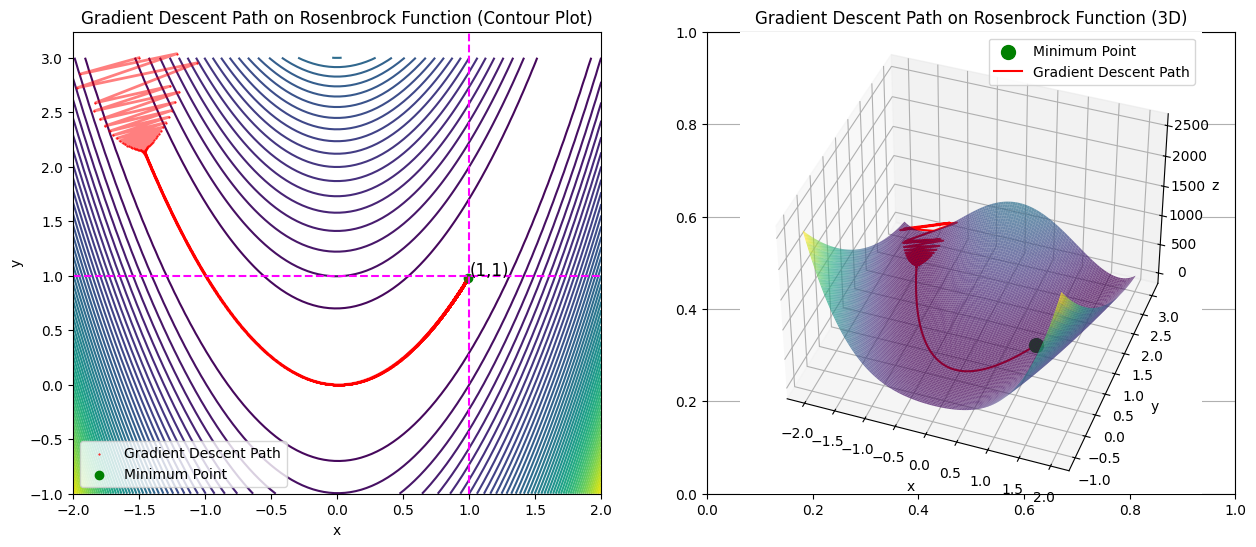

In [4]:
new_params = Dict[String,Float64]()
new_params['initial_x'] = -1.5
new_params['initial_y'] = 3
params.update(new_params)

# Run gradient descent
history = gradient_descent(params)

# Calculate minimum of Rosenbrock function
min_val = history[-1]

# Print results
print("Minimum of Rosenbrock function:")
print("x =", min_val[0])
print("y =", min_val[1])
print("Function value at minimum point:", min_val[2])
np_arr2 = np.empty((len(history), 3))
for i in range(len(history)):
    np_arr2[i]=history[i]
plot_results(np_arr2, min_val)

### Set

In [5]:
from collections import Set

fn print_set(set: Set[String]):
    for element in set:
        print(element[],end=" ")
    print()

# Define sets of genetic markers for two populations
set_A_markers = Set[String]('ATGC', 'CGTA', 'GCTA', 'TACG', 'AAGC')
set_B_markers = Set[String]('CGTA', 'CAGT', 'GGCA', 'ATGC', 'TTAG')

# Using methods
# Difference using difference()
print("Difference:")
print_set(set_A_markers.difference(set_B_markers))
print_set(set_A_markers - set_B_markers)
print()
print("Intersection update:")
common_markers_1 = Set[String](set_A_markers)  # Copy
common_markers_2 = Set[String](set_A_markers)  # Copy
common_markers_1.intersection_update(set_B_markers)
common_markers_2 &= set_B_markers
print_set(common_markers_1)
print_set(common_markers_2)
print()
print("Update:")
updated_A = Set[String](set_A_markers)  # Copy
new_markers = Set[String]('AACG', 'TTAG')
updated_A.update(new_markers)
print_set(updated_A)
print()


Difference:
GCTA TACG AAGC 
GCTA TACG AAGC 

Intersection update:
ATGC CGTA 
ATGC CGTA 

Update:
ATGC CGTA GCTA TACG AAGC AACG TTAG 



In [6]:
def reverse_list(sentence: String)->String:
    words = sentence.split(" ")
    words.reverse()
    reversed_sentence = String("")
    for w in words:
        reversed_sentence += w[]+" "
    return reversed_sentence

def reverse_iterator(sentence: String)->String:
    words = sentence.split(" ")
    reversed_sentence = String("")
    for w in reversed(words):
        reversed_sentence += w[]+" "
    return reversed_sentence

original_sentence = "Hello world, this is a test sentence."
print("Original sentence:", original_sentence)

reversed_sentence = reverse_list(original_sentence)
print("Reversed list sentence:", reversed_sentence)

reversed_sentence = reverse_iterator(original_sentence)
print("Reversed iterator sentence:", reversed_sentence)

Original sentence: Hello world, this is a test sentence.
Reversed list sentence: sentence. test a is this world, Hello 
Reversed iterator sentence: sentence. test a is this world, Hello 
